In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# load the data
df = pd.read_csv('diabetic_data.csv')



# Data Exploration 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


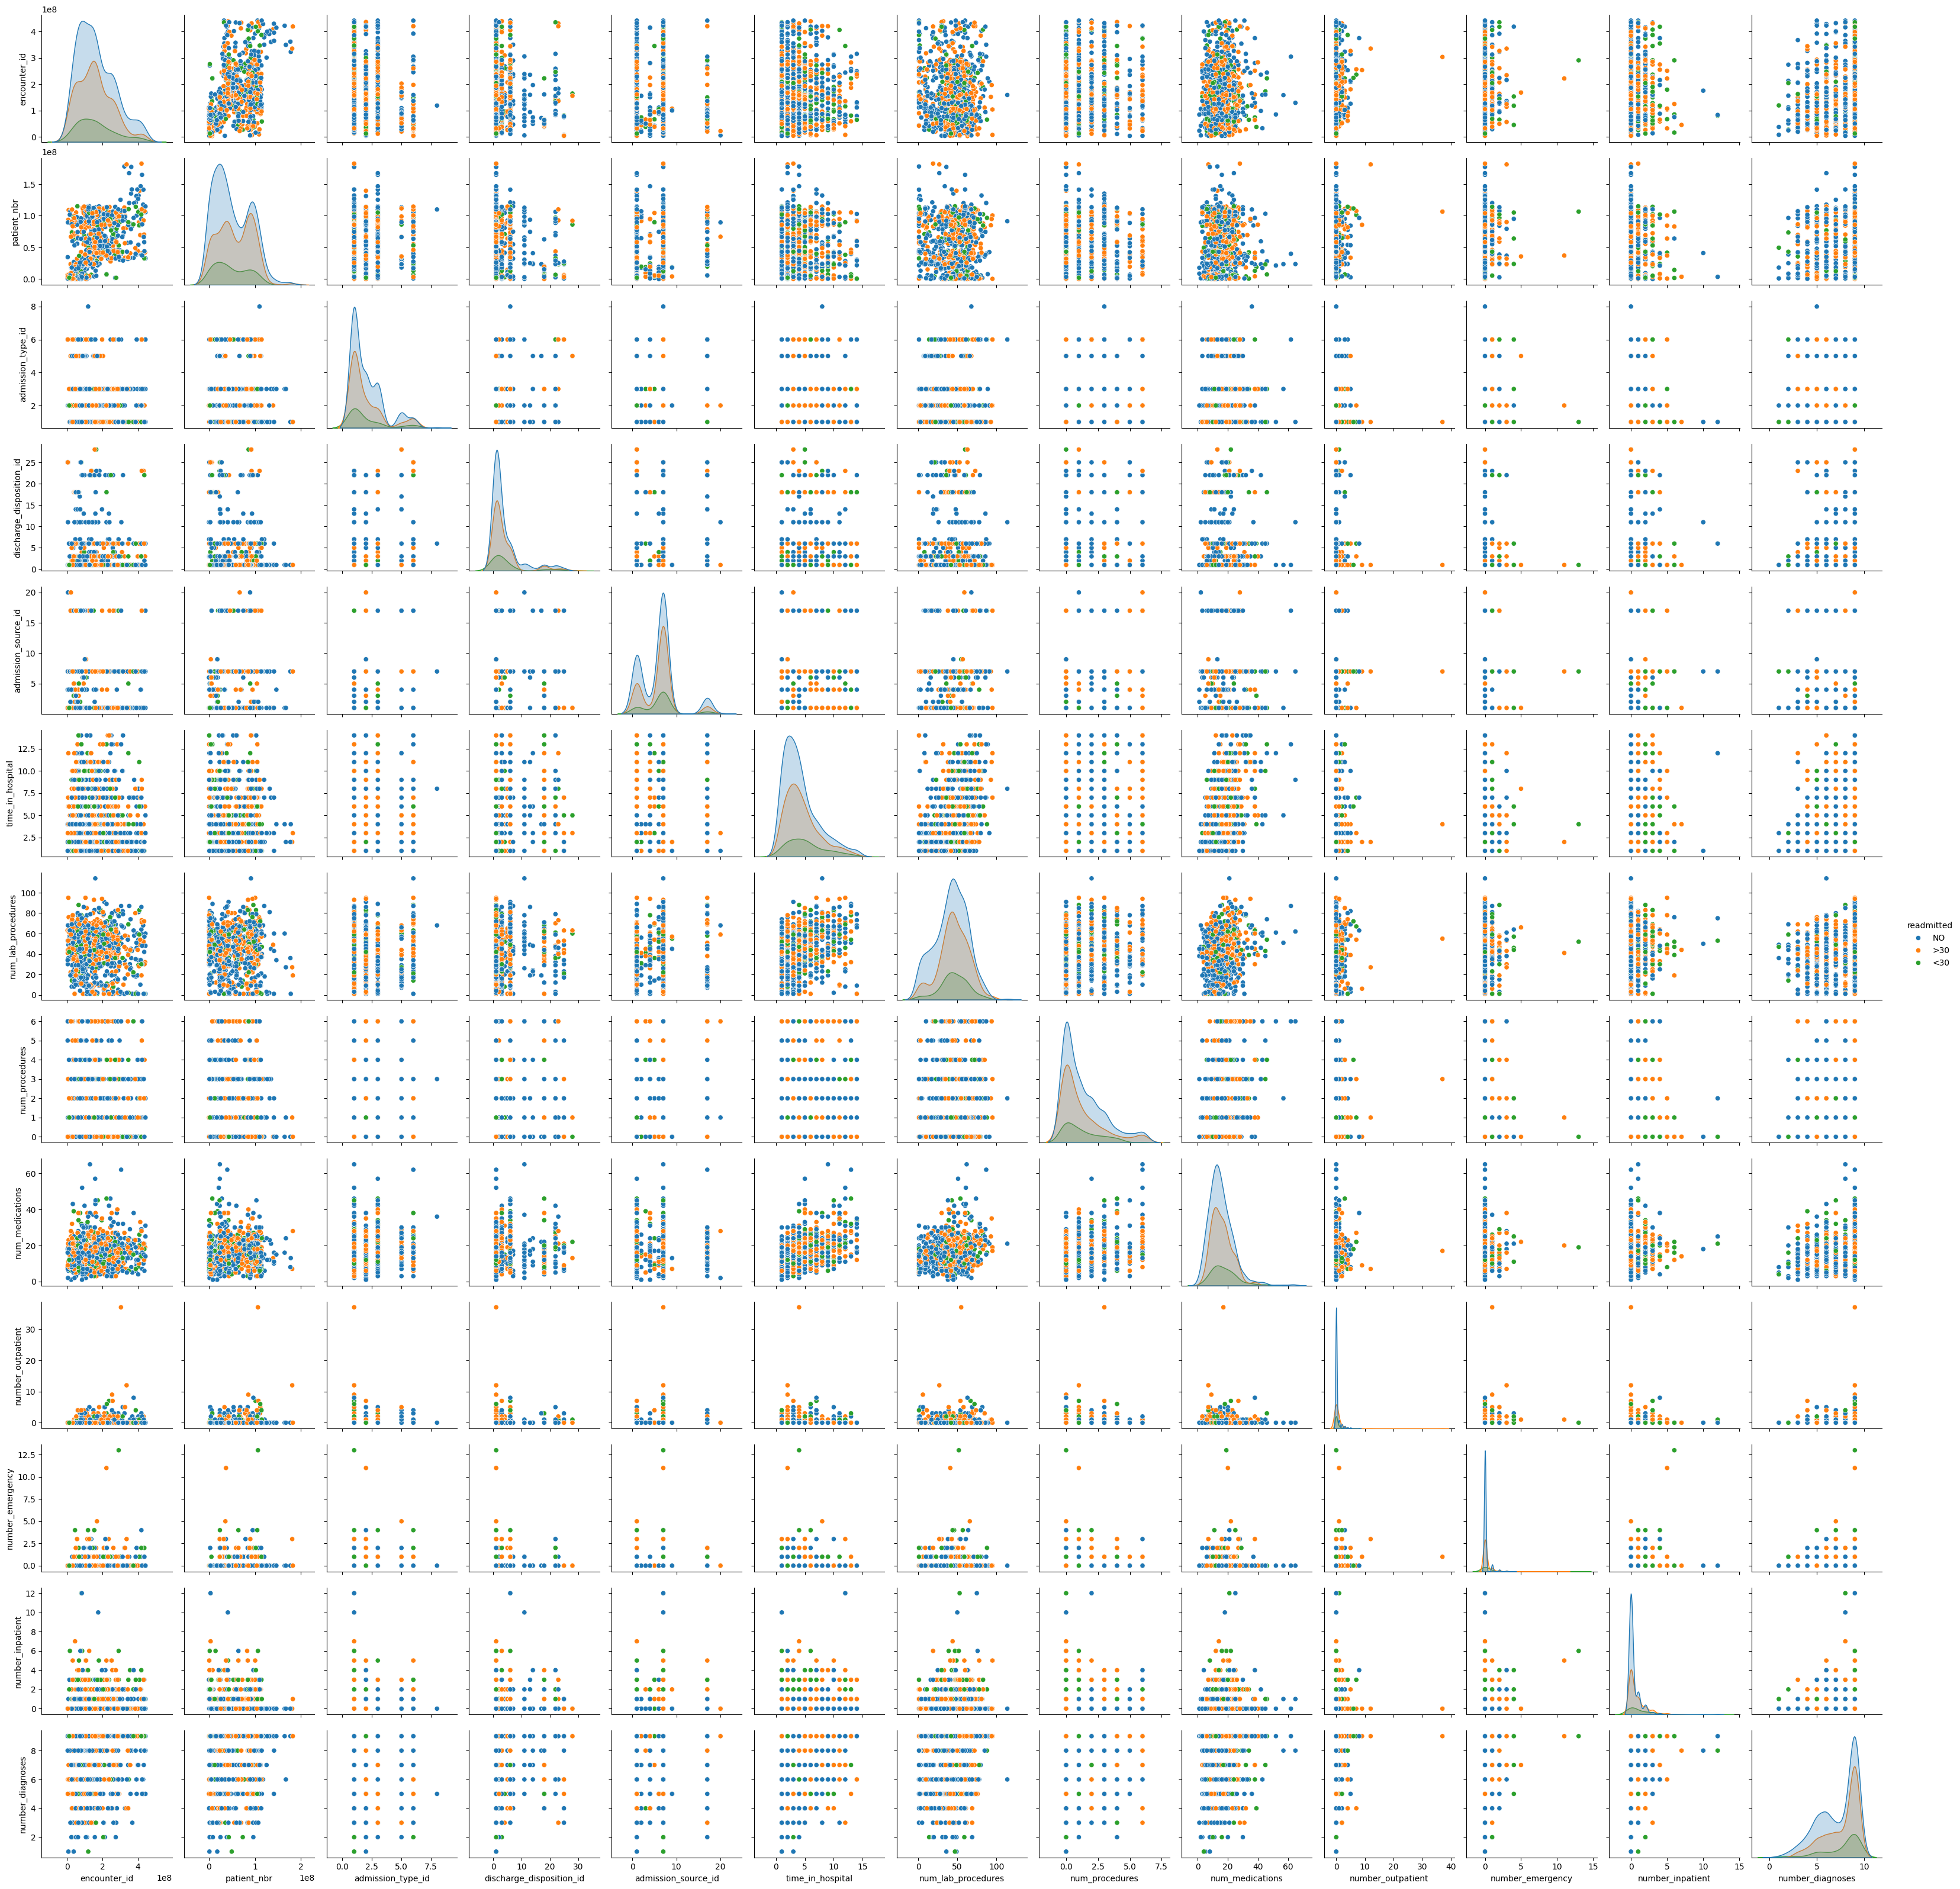

In [9]:
#get the scatter matrix
sns.pairplot(df.sample(1000), hue='readmitted', diag_kind='kde')
plt.show()

Based on the graphs above , it seems that the when looking at lab proceeders, there is a concentration of patinets returning to the hospital within 30 days. This is a good indicator that the # of lab proceeders could be a good feature to use in our model.



In [10]:
df['weight'].value_counts()


weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

Because the weight column is missing a lot of values, we should consider dropping it from our model, also 
it sems concerning that the most common weight is 75-100 lbs, this could be a sign that the data is not accurate.

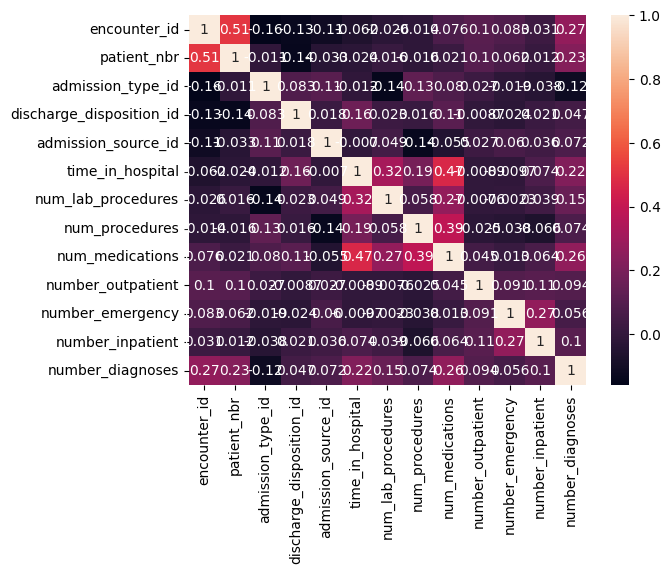

<Figure size 6000x6000 with 0 Axes>

In [11]:
# get the correlation matrix of numerical columns only
df2 = df.select_dtypes(include=[np.number])
corr = df2.corr()
sns.heatmap(corr, annot=True)
#make the layout wider
plt.figure(figsize=(60,60))
plt.show()



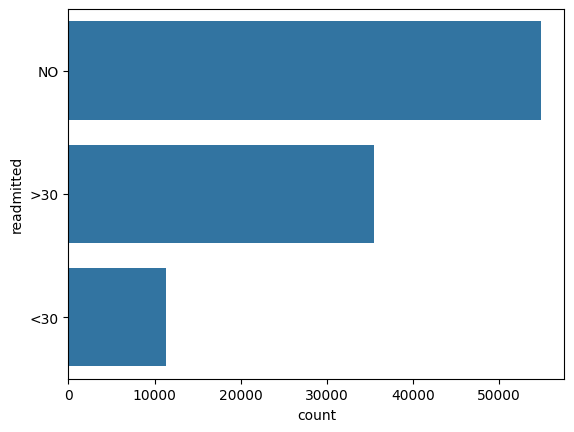

In [12]:
#look at the target variable distribution
sns.countplot(df['readmitted'])
plt.show()

Because there are 3 diffrent classed of readmission, we will need to treat this as a multi-class classification problem. We will incorporate a scoring system for each readmission class. if the patient is readmitted within 30 days, they will be given a score of 1, if they are readmitted within >30 days, they will be given a score of 2, and if they are not readmitted, they will be given a score of 3. This will allow us to use a single model to predict the readmission class.

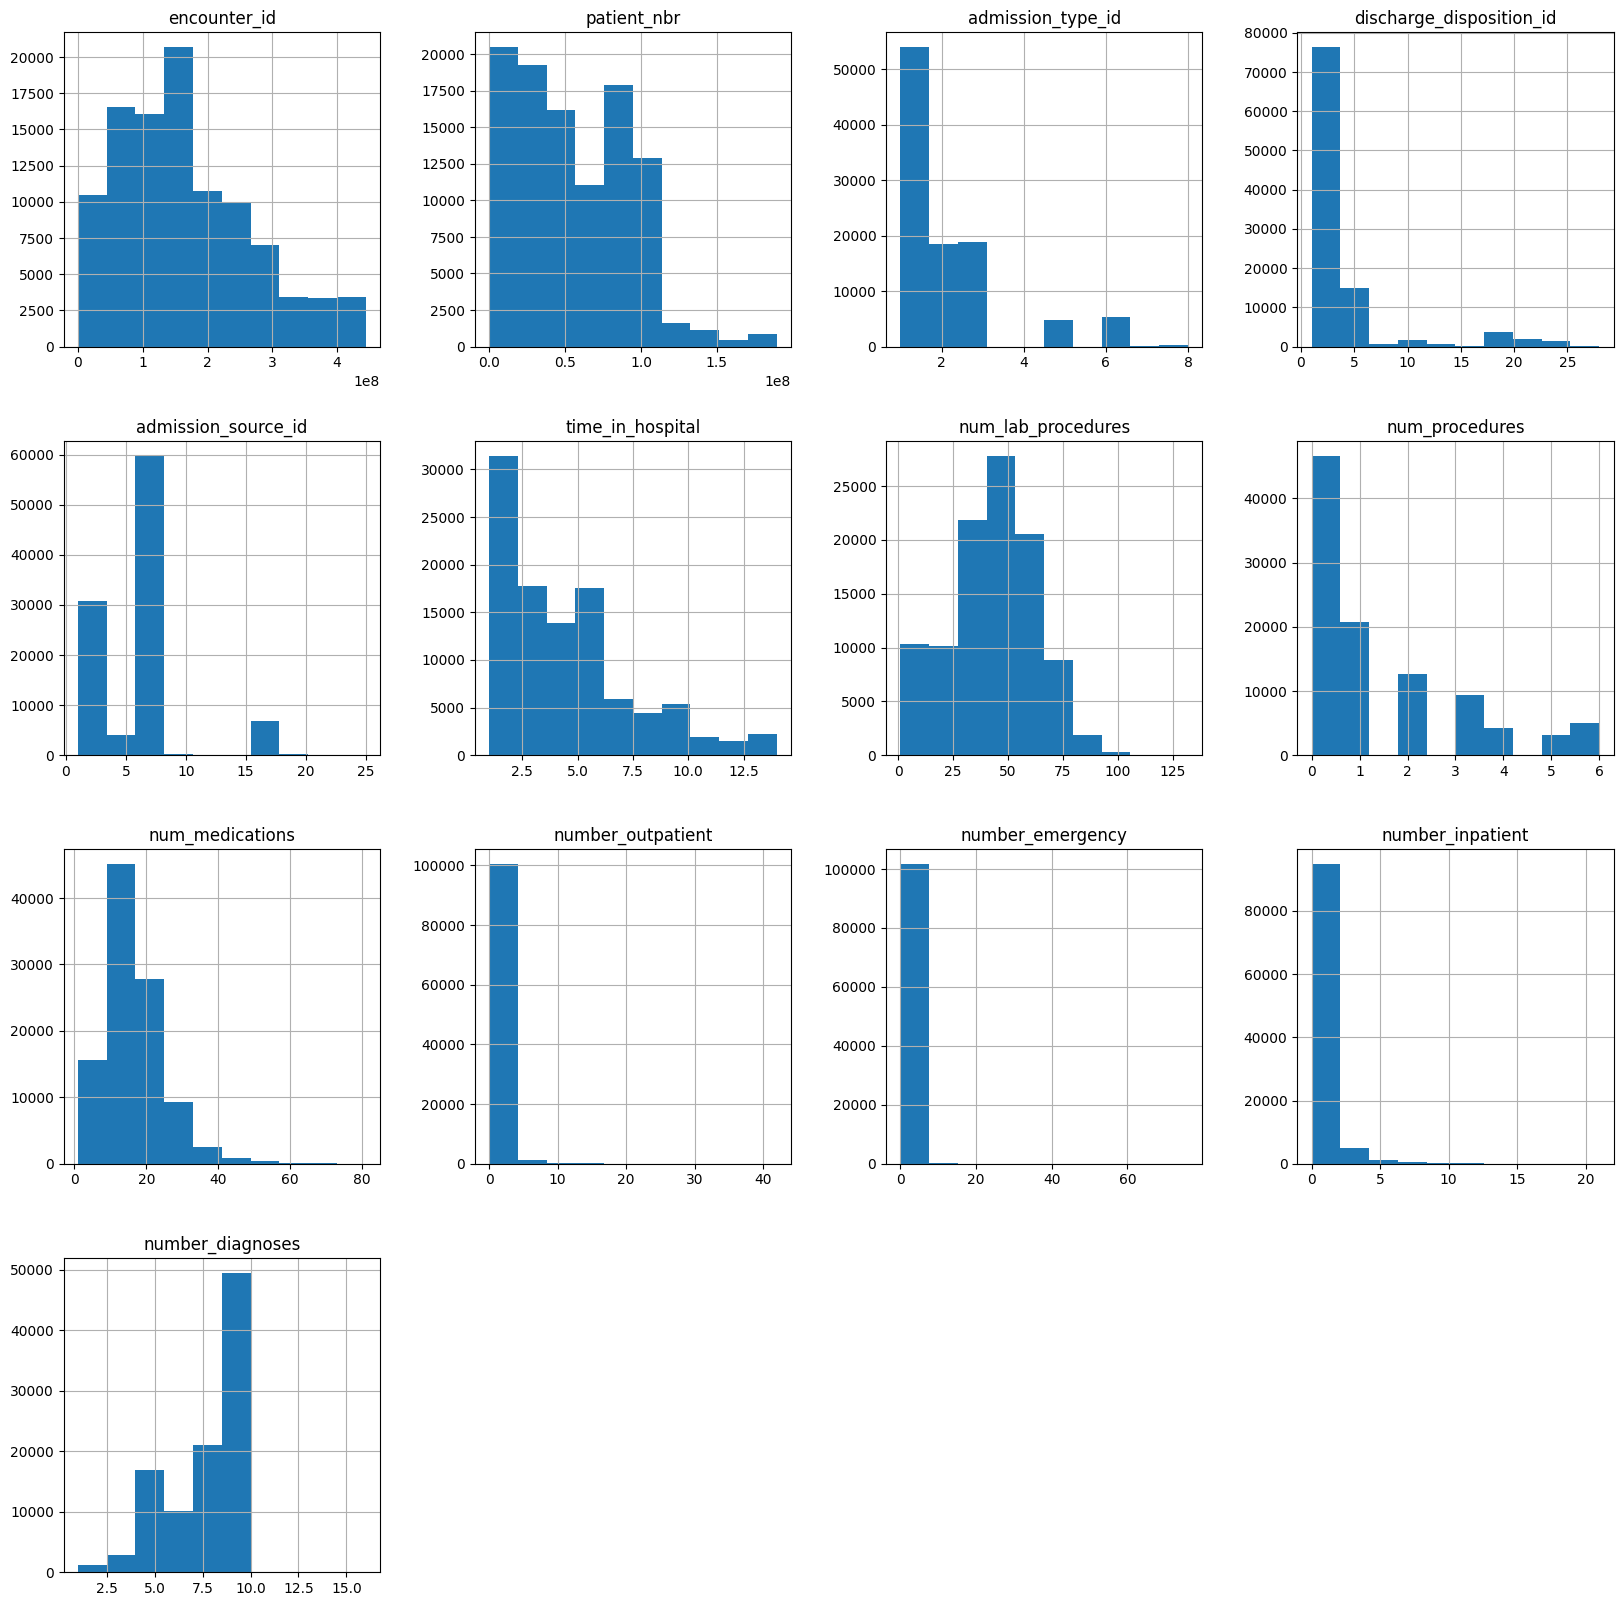

In [13]:
# look at the distribution of the numerical columns but make it look nicer
df2.hist(figsize=(20,20))
plt.show()


Most of the patients addmitted are addmitted due to emergency reasons. 

In [14]:
# look at infomraiton about the categorical columns
df.describe(include=['O'])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,5346,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,3,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,Norm,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,2597,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


/var/folders/58/v989862n3fgbk7qszg37rj8m0000gp/T/ipykernel_72043/1458968622.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered['race_num'] = df_filtered['race'].replace({'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Asian': 3, 'Other': 4}).astype(int)


TypeError: no numeric data to plot

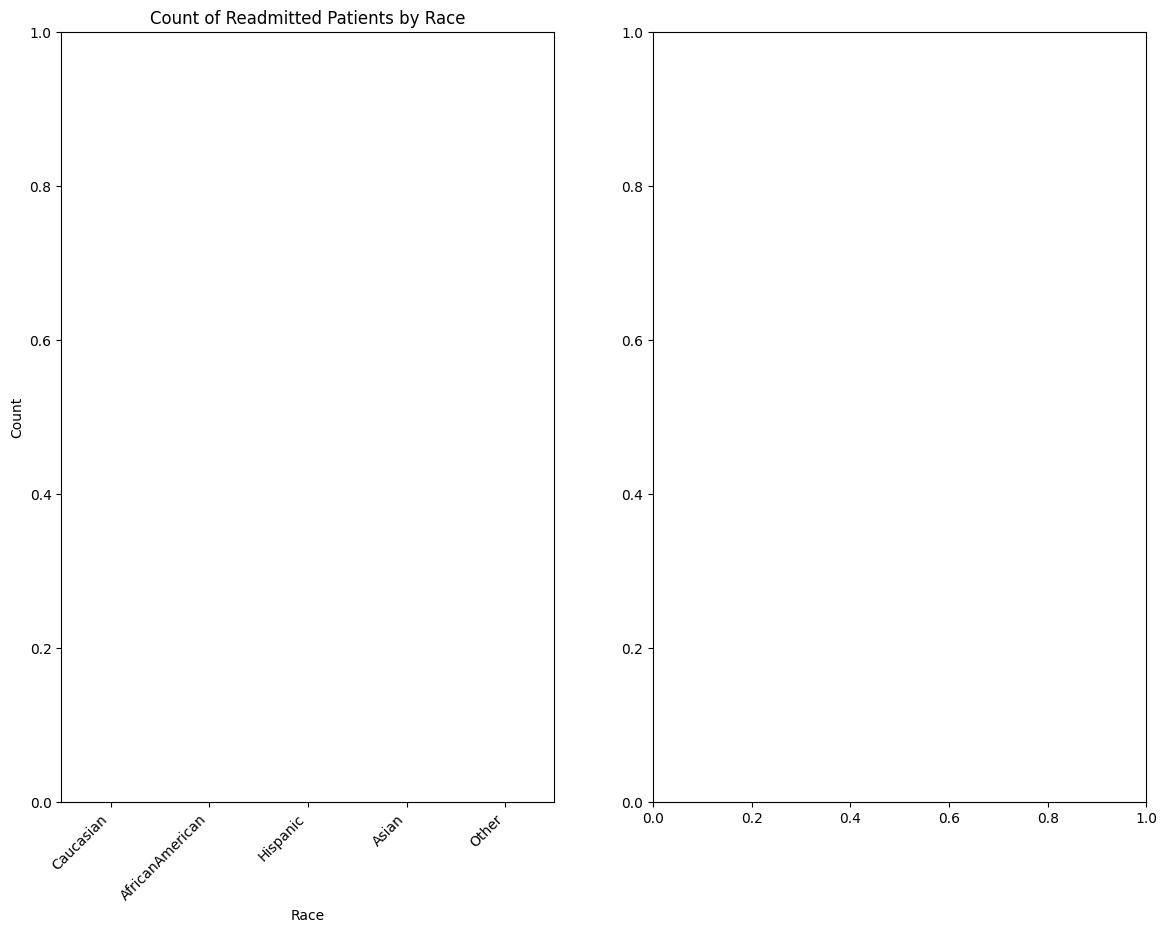

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows with '?' in the 'race' column
df_filtered = df[df['race'] != '?'].copy()  # Using .copy() to avoid setting with copy warning

# Convert 'race' to a numerical feature safely
df_filtered['race_num'] = df_filtered['race'].replace({'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Asian': 3, 'Other': 4}).astype(int)

# Convert 'readmitted' to the desired categories for legend mapping safely
readmitted_map = {0: '<30', 1: '>30', 2: 'No'}
df_filtered.loc[:, 'readmitted_mapped'] = df_filtered['readmitted'].map(readmitted_map)

# Set the figure size for both plots
plt.figure(figsize=(14, 10))

# Subplot 1: Original count plot
plt.subplot(1, 2, 1)
sns.countplot(x='race_num', hue='readmitted_mapped', data=df_filtered)
plt.xticks([0, 1, 2, 3, 4], ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other'], rotation=45, ha='right')
plt.title('Count of Readmitted Patients by Race')
plt.xlabel('Race')
plt.ylabel('Count')

# Subplot 2: Percentage stacked bar plot
plt.subplot(1, 2, 2)
# Group by 'race' and calculate the percentage of readmitted patients for each race
readmission_by_race = df_filtered.groupby('race')['readmitted_mapped'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plot the data as a stacked bar plot
readmission_by_race.plot(kind='bar', stacked=True, figsize=(12, 8), ax=plt.gca())

plt.title('Percentage of Readmitted Patients by Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2, 3, 4], ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other'], rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

The Probability of an African American patient being readmitted within 30 days is higher than the probability of a Caucasian patient being readmitted within 30 days. This could be a good feature to use in our model. 

It is also interesting to note that this might indicate that African American patients are not receiving the same level of care as Caucasian patients. This would have to be further investigated, a hypothesis test could be conducted to determine if this is statistically significant.

In [16]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['race'], df_filtered['readmitted_mapped'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant association between race and readmission.")
else:
    print("No statistically significant association found between race and readmission.")


ValueError: No data; `observed` has size 0.

The results of the chi-squared test indicate that race does have an impact on the readmission rate. Not only is 
this something that can help us in our model, but it is also something that should be investigated further by the hospital to ensure that all patients are receiving the same level of care.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out rows with '?' in the 'A1Cresult' column
df_a1c = df[df['A1Cresult'] != '?'].copy()  # Avoid setting with copy warning

# Ensure 'readmitted_mapped' is categorical for proper sorting and analysis
df_a1c['readmitted_mapped'] = pd.Categorical(
    df_a1c['readmitted_mapped'], categories=['<30', '>30', 'No'], ordered=True
)

# Countplot: Count of readmitted patients by A1C result
plt.figure(figsize=(10, 6))
sns.countplot(x='A1Cresult', hue='readmitted_mapped', data=df_a1c)
plt.title('Count of Readmitted Patients by A1C Test Result')
plt.xlabel('A1C Test Result')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

# Stacked Bar Chart: Percentage of readmitted patients by A1C result
# Normalize the value counts to calculate percentages
readmission_by_A1C = (
    df_a1c.groupby('A1Cresult')['readmitted_mapped']
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)

plt.figure(figsize=(12, 8))
ax = readmission_by_A1C.plot(kind='bar', stacked=True, figsize=(12, 8), alpha=0.85)
ax.set_title('Percentage of Readmitted Patients by A1C Test Result')
ax.set_xlabel('A1C Test Result')
ax.set_ylabel('Percentage')
plt.xticks(rotation=0)  # Make labels horizontal for readability
plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Additional Analysis: Chi-Square Test for Independence
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_a1c['A1Cresult'], df_a1c['readmitted_mapped'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("The relationship between A1C Test Results and Readmission is statistically significant.")
else:
    print("No statistically significant relationship found between A1C Test Results and Readmission.")


KeyError: 'readmitted_mapped'

on visual inspection it does not seem that a1c test results have a significant impact on readmission rates, but 
a chi-squared test determined that the realtionship between a1c test results and readmission rates is statistically significant.

In [ ]:
# plot some scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_inpatient', y='number_diagnoses', hue='readmitted', data=df)
plt.title('Number of Inpatient Visits vs. Number of Diagnoses')
plt.xlabel('Number of Inpatient Visits')
plt.ylabel('Number of Diagnoses')



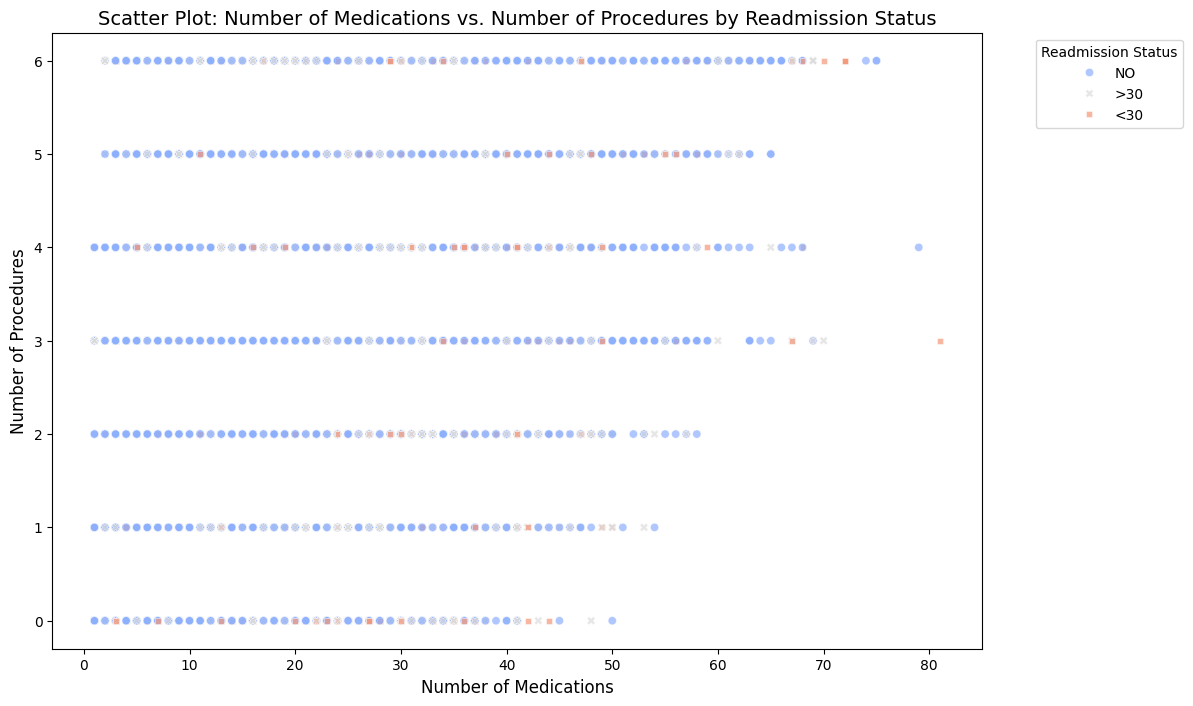

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='num_medications',
    y='num_procedures',
    hue='readmitted',  # Different colors for readmitted status
    style='readmitted',  # Different markers for readmitted status (optional)
    data=df,
    alpha=0.7,  # Transparency for overlapping points
    palette="coolwarm"  # Custom color palette
)

# Titles and labels
plt.title('Scatter Plot: Number of Medications vs. Number of Procedures by Readmission Status', fontsize=14)
plt.xlabel('Number of Medications', fontsize=12)
plt.ylabel('Number of Procedures', fontsize=12)
plt.legend(title='Readmission Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [19]:
#perform a chi-square test to see if there is a relationship between the number of medications and readmission
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['num_medications'], df['readmitted'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi2 Statistic: 1119.4132224407017
P-Value: 8.58737465246297e-149
Degrees of Freedom: 148


The results of the chi-squared test indicate that the number of lab procedures does have an impact on the readmission rate. This is something that can help us in our model.

## I'm not sure if these chi-squared tests (stats stuff) are helpful at all but still a crazy thing to look at. Will discuss with jeff tomorrow

In [20]:
# Let's do the pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer



In [21]:
df2 = df.copy()

In [22]:
#train test split
X = df2.drop('readmitted', axis=1)
y = df2['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Features to drop
features_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 
                    'medical_specialty', 'max_glu_serum', 'A1Cresult']

# Numeric features
num_features = X.select_dtypes(include=[np.number]).columns

# Multi-label features (corrected syntax)
multi_label_features = [
    'metaformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
    'metformin-pioglitazone', 'race', 'addmission_type_id', 
    'discharge_disposition_id', 'admission_source_id'
]

# One-hot features
one_hot_features = ['change', 'diabetesMed']

# Replace '?' with np.nan in preprocessing step
replace_question_mark = Pipeline(steps=[
    ('replace_question_mark', SimpleImputer(strategy='constant', fill_value=np.nan))
])

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

multi_label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Fixed transformer
])

one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Filter out missing columns
multi_label_features = [col for col in multi_label_features if col in X.columns]
one_hot_features = [col for col in one_hot_features if col in X.columns]
numeric_features = [col for col in num_features if col in X.columns]

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('multi_label', multi_label_transformer, multi_label_features),
        ('one_hot', one_hot_transformer, one_hot_features)
    ])


In [24]:
# List of classifiers to compare, use the 10 most common classifiers , 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier



In [27]:
classifiers = [
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=42, max_iter=1000)), 
    ('LinearSVC', LinearSVC(random_state=42)),
    ('SVC-RBF', SVC(kernel='rbf', cache_size=2000, random_state=42)),
    ('KNeighbors', KNeighborsClassifier(n_jobs=-1)),  # No random_state for KNeighbors
    ('DecisionTree', DecisionTreeClassifier(min_samples_leaf=3, random_state=42)),
    ('RandomForest', RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)),
    ('ExtraTrees', ExtraTreesClassifier(max_depth=10, n_jobs=-1, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(n_jobs=-1, random_state=42)),
    ('GaussianNB', GaussianNB()),
    ('BernoulliNB', BernoulliNB()),
    ('MultinomialNB', MultinomialNB()),
    ('SGD-log_loss', SGDClassifier(loss='log_loss', n_jobs=-1, random_state=42)), 
    ('SGD-hinge', SGDClassifier(loss='hinge', random_state=42)),
    ('Perceptron', Perceptron(random_state=42)),
    ('PassiveAggressive', PassiveAggressiveClassifier(random_state=42)),
    ('RidgeClassifier', RidgeClassifier(random_state=42)),
    ('RidgeClassifierCV', RidgeClassifierCV()),
    ('MLPClassifier', MLPClassifier(random_state=42))
]


In [ ]:
%%time 
pipelines = {}
for clf_name, clf in classifiers:
    pipelines[f'pipeline_{clf_name}'] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (clf_name, clf)
    ])

# Fit and evaluate each pipeline, but save each fit to a pkl file so if we fail we can continue
import pickle
results = {}
for pipeline_name, pipeline in pipelines.items():
    print(f'Fitting {pipeline_name}...')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[pipeline_name] = accuracy
    with open(f'{pipeline_name}.pkl', 'wb') as file:
        pickle.dump(pipeline, file)
    print(f"finished fitting {pipeline_name} with accuracy {accuracy}")

Fitting pipeline_LogisticRegression...
finished fitting pipeline_LogisticRegression with accuracy 0.5848481870885329
Fitting pipeline_LinearSVC...
finished fitting pipeline_LinearSVC with accuracy 0.5831286233664145
Fitting pipeline_SVC-RBF...
